<div style="border:solid black 2px; padding: 20px">
Андрей, привет!

Меня зовут Сергей Кулешин, и я буду делать ревью твоего проекта. Давай будем общаться на «ты». Но если тебе комфортнее на «вы», обязательно сообщи мне об этом. Моя основная цель - не указать тебе на совершенные тобой ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
    
Свои комментарии я буду выделять следующим образом:
<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ Так выделено то, что необходимо исправить, прежде чем я смогу принять твой проект.
</div>
    
    
<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Так отмечены не обязательные к доработке моменты. Mожешь учесть их при редактировании проекта. На твое усмотрение.
</div>
    
    
<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ А так удачные решения и подходы, на которые стоит опираться в будущих проектах.
</div>
    
    
<div style="border:solid black 2px; padding: 20px">
  
    
  <b>Чек-лист доработок</b>
    
  📃 Такой комментарий будет в конце тетрадки. В нем будут еще раз указаны нюансы, требующие обязательного исправления.
</div>

Предлагаю работать над проектом в форме диалога: если ты <b>что-то меняешь</b> в работе по моим рекомендациям — <b>напиши об этом</b> в ячейке `Markdown` и помечай комментарий каким-то заметным цветом, например так:
    
    
```
<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Текст комментария.
</div>
```
    
<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Текст комментария.
</div>
    
Пожалуйста, <b>не перемещай, не изменяй и не удаляй мои комментарии</b>. Такой формат работы поможет выполнить повторную проверку твоего проекта оперативнее.

<div style="background:#e5e5e5; color:#000; padding:10px">
    <b>Общее впечатление о проекте</b>
    
Ты верно разобрался в причинах убыточности бизнеса. Видно, что ты умеешь писать и применять функции, это здорово облегчает работу аналитика. Однако есть моменты, которые требуют твоего внимания и доработки.
</div>

<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Хорошо, что есть описание цели проекта, только не надо копировать с задания. Лучше написать своими словами, например: 
- краткое описания проекта
- цели и задачи
- описание исходных данных
- план (декомпозиция) анализа данных 

и др информация.
</div>

<div class="alert alert-block alert-info">

  <b>Комментарий cтудента</b>

  Добавлено.
</div>

# Проект Procrastinate Pro+ #
Цель проекта: выявление причин убыточности приложения "Procrastinate Pro+"
План проведения исследования:
1. загрузка и подготовка данных
2. исследовательский анализ данных
3. оценка затрат на маркетинг
4. оценка окупаемости затрат на маркетинг

## Описание данных ##
Таблица visits_log_short:

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short:

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short:

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

In [42]:
!pip install plotly_express

<a id='import'></a>
# Импорт библиотек #

In [43]:
import numpy as np
import pandas as pd
import warnings
#from IPython.core.display_functions import display
from IPython.display import display
from datetime import timedelta, datetime
import plotly_express as px
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


warnings.filterwarnings('ignore')

<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ В тренажере 2 библиотеки не импортировались, была ошибка, я их закомментировал.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  1. plotly_express - библиотека установлена
  2. изменен импорт display. IDE указала что используемый импорт устарел
</div>

<a id='user_functions'></a>
# Пользовательские функции #

## Функция переименования столбцов ##

In [44]:
def prepare_columns(dataframe):
    dataframe.columns = dataframe.columns.str.lower()
    dataframe.columns = dataframe.columns.str.strip()
    dataframe.columns = dataframe.columns.str.replace(' ', '_')

## Функция обработки строковых значений ##

In [45]:
def prepare_string(dataframe):
    for column in dataframe.columns:
        if dataframe.dtypes[column] == 'object':
            dataframe[column] = dataframe[column].str.lower()
            dataframe[column] = dataframe[column].str.strip()

<a id='data'></a>
# Загрузка данных #

In [46]:
data_visits = pd.read_csv(filepath_or_buffer='datasets/visits_info_short.csv')
data_orders = pd.read_csv(filepath_or_buffer='datasets/orders_info_short.csv')
data_costs = pd.read_csv(filepath_or_buffer='datasets/costs_info_short.csv')

<a id='data_preview'></a>
## Первичный осмотр данных ##

In [47]:
print(data_visits.info())
print('############')
print(data_orders.info())
print('############')
print(data_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data colum

In [48]:
display(data_visits)
display(data_orders)
display(data_costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [49]:
print(data_visits.isnull().sum())
print('############')
print(data_orders.isnull().sum())
print('############')
print(data_costs.isnull().sum())

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
############
User Id     0
Event Dt    0
Revenue     0
dtype: int64
############
dt         0
Channel    0
costs      0
dtype: int64


## Результаты первичного осмотра ##
1. пропуски в данных отсутствуют
2. изменить имена столбцов:
 * data_visits[User ID] -> data_visits[user_id]
 * data_visits[Region] -> data_visits[region]
 * data_visits[Device] -> data_visits[device]
 * data_visits[Channel] -> data_visits[channel]
 * data_visits[Session Start] -> data_visits[session_start]
 * data_visits[Session End] -> data_visits[session_end]
 * data_orders[User ID] -> data_orders[user_id]
 * data_orders[Event Dt] -> data_orders[event_dt]
 * data_orders[Revenue] -> data_orders[revenue]
 * data_costs[Channel] -> data_costs[channel]
3. изменить тип данных:
 * data_costs[dt] -> datetime
 * data_orders[event_dt] -> datetime
 * data_visits[session_start] -> datetime
 * data_visits[session_end] -> datetime
4. значения столбцов типа object -> нижний регистр

<a id='prepare'></a>
# Предобработка данных #

<a id='prepare_columns'></a>
## Переименование столбцов ##

In [50]:
prepare_columns(dataframe=data_orders)
prepare_columns(dataframe=data_visits)
prepare_columns(dataframe=data_costs)

In [51]:
print(data_orders.info())
print(data_visits.info())
print(data_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #  

<a id='prepare_types'></a>
## Изменение типа данных ##

In [52]:
data_costs['dt'] = pd.to_datetime(data_costs['dt'])
data_orders['event_dt'] = pd.to_datetime(data_orders['event_dt'])
data_visits['session_start'] = pd.to_datetime(data_visits['session_start'])
data_visits['session_end'] = pd.to_datetime(data_visits['session_end'])

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Молодец, что заметил неверный формат даты и поменял.
</div>

In [53]:
print(data_costs.info())
print(data_orders.info())
print(data_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------     

<a id='prepare_string'></a>
## Изменение строковых значений ##

In [54]:
prepare_string(dataframe=data_visits)
prepare_string(dataframe=data_costs)

In [55]:
print(data_costs.duplicated().sum())
print(data_visits.duplicated().sum())
print(data_orders.duplicated().sum())

0
0
0


<div class="alert alert-danger">
<b>Комментарий ревьюера</b>
    
  ❌ Данные подготовлены к анализу, но не проверены дубликаты! Если таковые имеются, они могут сильно исказить наши результаты исследования.
    
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Проверка дубликатов добавлена.
</div>

<a id='functions'></a>
# Функции LTV, ROI, удержания и конверсии #

## Функция расчета конверсии ##

In [56]:
def get_conversion(
        profiles,
        purchases,
        observation_date,
        horizon_days,
        dimensions=[],
        ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
            .groupby('user_id')
            .agg({'event_dt': 'first'})
            .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
            result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
                .agg({'user_id': 'nunique'})
                .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция расчета удержания ##

In [57]:
def get_retention(
        profiles,
        sessions,
        observation_date,
        horizon_days,
        dimensions=[],
        ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
            result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
                .agg({'user_id': 'nunique'})
                .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция расчета LTV, ROI ##

In [58]:
def get_ltv(
        profiles,
        purchases,
        observation_date,
        horizon_days,
        dimensions=[],
        ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
            result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
                .agg({'user_id': 'nunique'})
                .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
                .agg({'acquisition_cost': 'mean'})
                .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

## Функция получения пользовательских профилей ##

In [59]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
            .groupby('user_id')
            .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
            .rename(columns={'session_start': 'first_ts'})
            .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'unique_users'})
            .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Отличные функции! 👍
</div>

<a id='exploratory'></a>
# Исследовательский анализ данных #

<a id='exploratory_profiles'></a>
## Пользовательские профили ##

In [60]:
events = None

data_costs['dt'] = pd.to_datetime(data_costs['dt']).dt.date

users =  get_profiles(sessions=data_visits, orders=data_orders, events=events, ad_costs=data_costs)

min_date_att = users['first_ts'].min() #минимальная дата привлечения пользователей
max_date_att = users['first_ts'].max() #максимальная дата привлечения пользователей
print(min_date_att)
print(max_date_att)

2019-05-01 00:00:41
2019-10-27 23:59:04


<div class="alert alert-danger">

  <b>Комментарий ревьюера</b>

  ❌ Минимальную и максимальную даты привлечения пользователей надо определять из профилей пользователей, а не из общего датафрейма визитов.
</div>

<div class="alert alert-block alert-info">

  <b>Комментарий cтудента</b>

  Исправлено.
  Не понятно только в чем разница. Пользовательские профили являются агрегатом на основе датафрейма визитов.
</div>

<a id='exploratory_graph'></a>
## Функция визуализации данных пользовательских профилей ##

In [61]:
def profiles_viz(profiles, agg_column, group_column=[]):

    for column in group_column:
        profiles_group = profiles.groupby(column)\
            .agg({agg_column:np.mean})\
            .reset_index()\
            .sort_values(by=agg_column, ascending=False)
        profiles_group['payer_raw'] = profiles_group[agg_column]
        profiles_group[agg_column] = profiles_group['payer_raw'] * 100

        fig = px.bar(data_frame=profiles_group,
                     x=column,
                     y=agg_column,
                     color=column,
                     template='seaborn',
                     text_auto='.3s')

        if column == 'region':
            fig.update_layout(title='% уникальных покупателей для регионов',
                              showlegend=False)
            fig.update_xaxes(title='Регион')
            fig.update_yaxes(title='% покупателей')
            fig.show()
        elif column == 'device':
            fig.update_layout(title='% уникальных покупателей для устройств',
                              showlegend=False)
            fig.update_xaxes(title='Тип устройства')
            fig.update_yaxes(title='% покупателей')
            fig.show()
        elif column == 'channel':
            fig.update_layout(title='% уникальных покупателей привлеченных каналом',
                              showlegend=False)
            fig.update_xaxes(title='Канал')
            fig.update_yaxes(title='% покупателей')
            fig.show()

<a id='exploratory_viz'></a>
## Графики платящих пользователей для регионов, типов устройств, каналам привлечения ##

In [62]:
profiles_viz(profiles=users, group_column=['region', 'device', 'channel'], agg_column='payer')

<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Из-за ошибки импорта библиотеки тут так-же возникает ошибка: NameError: `name 'px' is not defined`
</div>

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ В задании нас просят: "Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны\устройства\канала".
    
 Построй, пожалуйста, таблички с этими данными, например с такими колонками: 'region'  'Пользователи'  'Платящие пользователи'  '% платящих'
    

</div>

<div class="alert alert-block alert-info">

<b>Комментарий cтудента</b>
После установки и импорта библиотеки plotly_express все необходимые данные будут отображены на графиках

</div>

<a id='marketing'></a>
# Маркетинг #

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ Все графики по шагу тоже выдают ошибку. Надо исправить весь шаг.

</div>

<div class="alert alert-block alert-info">

<b>Комментарий cтудента</b>
После установки и импорта библиотеки plotly_express все необходимые данные будут отображены на графиках

</div>

<a id='marketing_costs'></a>
## Расходы на маркетинг ##

In [63]:
fig = px.bar(data_frame=data_costs.pivot_table(index='channel', values='costs', aggfunc=np.sum)
             .reset_index()
             .sort_values(by='costs', ascending=False),
             x='channel',
             y='costs',
             color='channel',
             text_auto='.3s',
             template='seaborn',
             labels={'channel':'Канал привлечения',
                     'costs':'Расходы'},
             title='Расходы на маркетинг')

fig.add_shape(type="line",
              line_color="salmon",
              line_width=3,
              opacity=1,
              line_dash="dot",
              x0=0,
              x1=1,
              xref='paper',
              y0=data_costs['costs'].sum(),
              y1=data_costs['costs'].sum(),
              yref="y")

fig.add_trace(go.Scatter(
    x=['opplecreativemedia'],
    y=[data_costs['costs'].sum().round(2) - 5*10**3],
    text=[f'Сумма расходов на маркетинг: {data_costs["costs"].sum().round(2)}'],
    mode="text"))

fig.update_layout(showlegend=False)
fig.show()

<a id='marketing_time'></a>
## Ежемесячные расходы на маркетинг ##

In [64]:
data_costs['month_name'] = pd.to_datetime(data_costs['dt']).dt.month_name()
data_costs['month'] = pd.to_datetime(data_costs['dt']).dt.month

fig = px.line(data_frame=data_costs.groupby(by=['month','month_name','channel'])
              .agg({'costs':'sum'})
              .reset_index()
              .sort_values(by='month'),
              x='month_name',
              y='costs',
              color='channel',
              template='seaborn',
              labels={'channel':'Канал привлечения',
                      'costs':'Расходы',
                      'month_name':''},
              title='Ежемесячные расходы на маркетинг')
fig.show()

In [65]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles=users,
                                                      purchases=data_orders,
                                                      observation_date=max_date_att.date(),
                                                      horizon_days=14,
                                                      dimensions=['channel'])

<a id='marketing_cac'></a>
## CAC ##

In [66]:
cac = roi.reset_index()[['channel', 'cac']].sort_values(by='cac', ascending=False)

In [67]:
fig = px.bar(data_frame=cac,
             x='channel',
             y='cac',
             color='channel',
             text_auto='.2f',
             template='seaborn',
             labels={'channel':'Канал привлечения',
                     'cac':'CAC'},
             title='CAC каналов')
fig.add_shape(type="line",
              line_color="salmon",
              line_width=3,
              opacity=1,
              line_dash="dot",
              x0=0,
              x1=1,
              xref='paper',
              y0=np.mean(cac['cac']),
              y1=np.mean(cac['cac']),
              yref="y")
fig.add_trace(go.Scatter(
    x=['rocketsuperads'],
    y=[np.mean(cac['cac']).round(2) + 0.1],
    text=[f'CAC проекта: {np.mean(cac["cac"]).round(2)}'],
    mode="text"))
fig.update_layout(showlegend=False)
fig.show()

# Итоги исследования затрат на маркетинг #
1. Сумма расходов на маркетинг за весь период составила ~105000
2. Самыми дорогими каналами привлечения новых пользователей стали:
   - tiptop: CAC=2.75
   - faceboom CAC=1.11
3. Среднее значение CAC для всего проекта = 0.75

<a id='payback'></a>
# Окупаемость рекламы #

<a id='payback_rolling'></a>
## Функция сглаживания датафрейма ##

In [68]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

<a id='payback_plot'></a>
## Функция для визуализации LTV и ROI ##

In [69]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<a id='payback_full'></a>
## Анализ общей окупаемости рекламы ##

In [70]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles=users.query('channel != "organic"'),
                                                      purchases=data_orders,
                                                      observation_date=max_date_att.date(),
                                                      horizon_days=14)

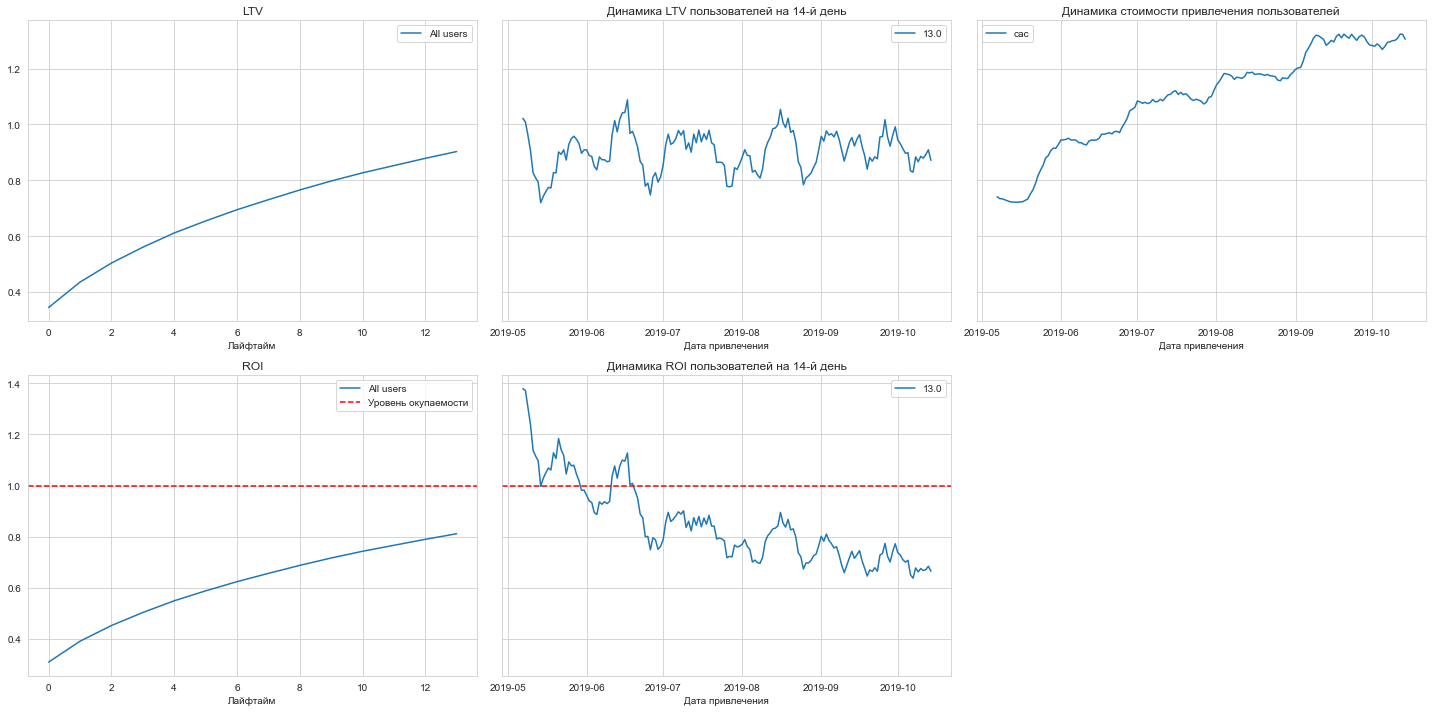

In [71]:
plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=14,
             window=7)

## Итоги анализа общей окупаемости рекламы ##
1. Затараты на рекламу не окупаются
2. Стоимость привлечения новых пользователей растет
3. Постоянное падение окупаемости рекламы наблюдается со второй половины июля 2019
4. Поятонный рост стоимости привлечения новых пользователей наблюдается со второй половины июля 2019

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ Тут есть один недочет, который искажает общие данные: из расчетов нам следует исключить пользователей с органическим трафиком, поскольку мы за них ничего не платим. САС на прошлом шаге и всю оценку окупаемости рекламы для привлечения пользователей, рассчитываем по пользователям, пришедшим с платныx рекламныx каналов: 
```python
profiles = profiles.query('channel != "organic"')
```
Пересчитай все, пожалуйста! Посмотрим, насколько сильно изменятся САС, графики. И подкорректируй выводы.
</div>

<div class="alert alert-block alert-info">

<b>Комментарий cтудента</b>
Исправлено.

</div>

<a id='payback_device'></a>
## Анализ окупаемости рекламы с учетом пользовательских устройств ##

In [72]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles=users,
                                                      purchases=data_orders,
                                                      observation_date=max_date_att.date(),
                                                      horizon_days=14,
                                                      dimensions=['device'])

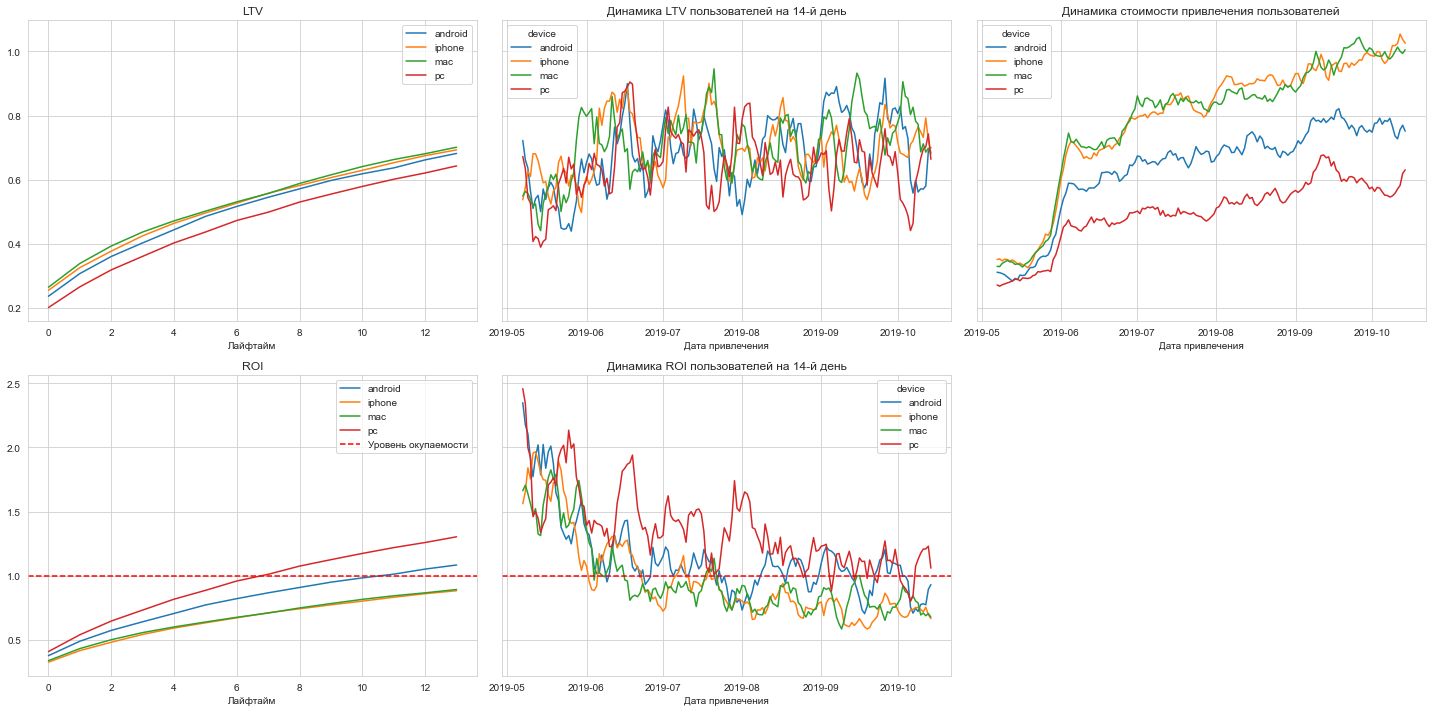

In [73]:
plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=14,
             window=7)

## Итоги анализа окупаемости рекламы с учетом пользовательских устройств ##
1. окупаемость достинается только для пользователей android/pc
2. не смотря на то что LTV пользователей iphone/mac выше чем у остальных типов устройств, пользователи iphone/mac не окупаются
3. затраты на привлечение пользователей iphone/mac значительно выше чем на привлечение пользователей android/pc
Возможные причины:
   - разные каналы привлечения пользователей iphone/mac и android/pc
   - площадки одинаковы, но стоимость пользователей разных платформ разная

<a id='payback_country'></a>
## Анализ окупаемость рекламы для разных стран ##

In [74]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles=users,
                                                      purchases=data_orders,
                                                      observation_date=max_date_att.date(),
                                                      horizon_days=14,
                                                      dimensions=['region'])

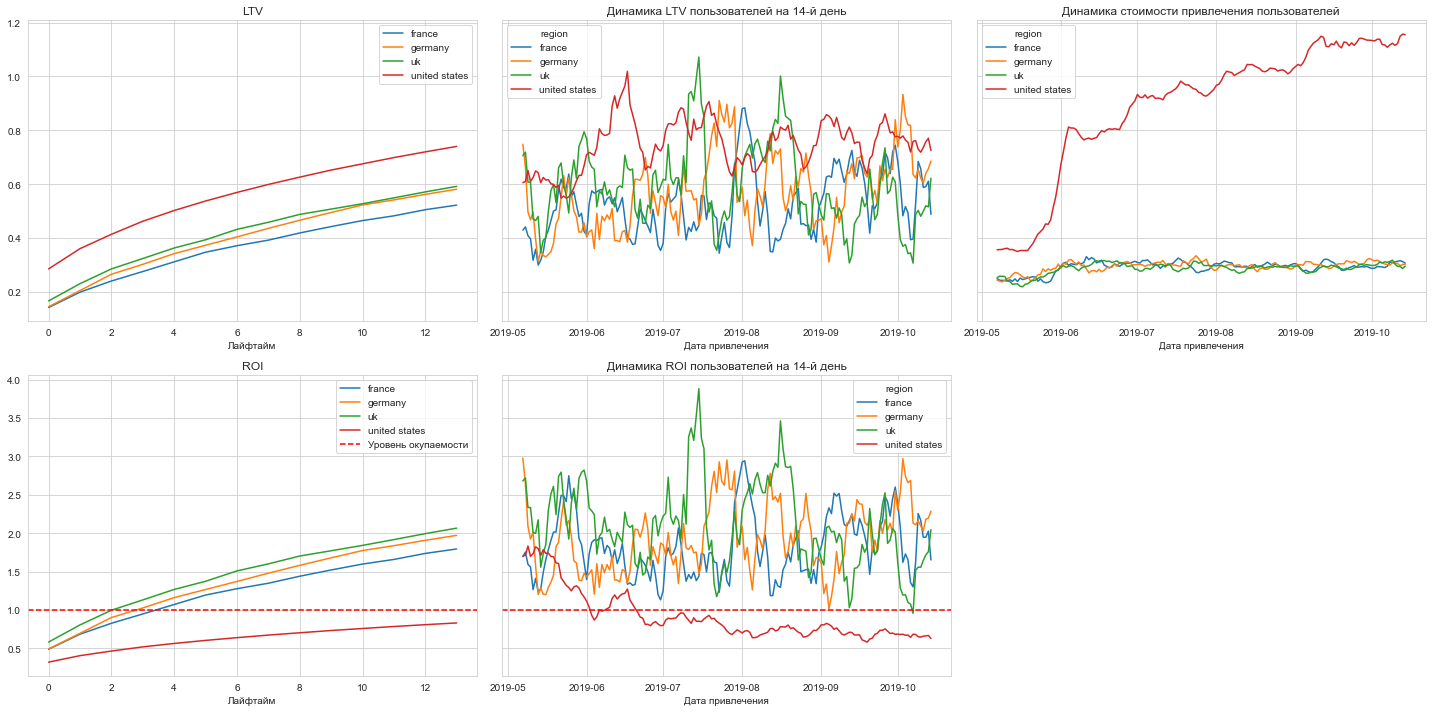

In [75]:
plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=14,
             window=7)

## Итоги анализа окупаемости рекламы в разных странах ##
1. стоимость привлечения пользователей из США в 6 раз выше привлечения пользователей из других стран
2. пользователи из США не окупаются
3. рост стоимости привлечения пользователей из США совпадает со временем падения окупаемости
4. график падения окупаемости рекламы для проекта совпадает с графиком падения окупаемости пользоватлей из США

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Согласен с выводами. Можно еще изучить рекламу в США отдельно.
</div>

<a id='payback_channel'></a>
## Анализ окупаемости рекламы для разных каналов ##

In [76]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles=users,
                                                      purchases=data_orders,
                                                      observation_date=max_date_att.date(),
                                                      horizon_days=14,
                                                      dimensions=['channel'])

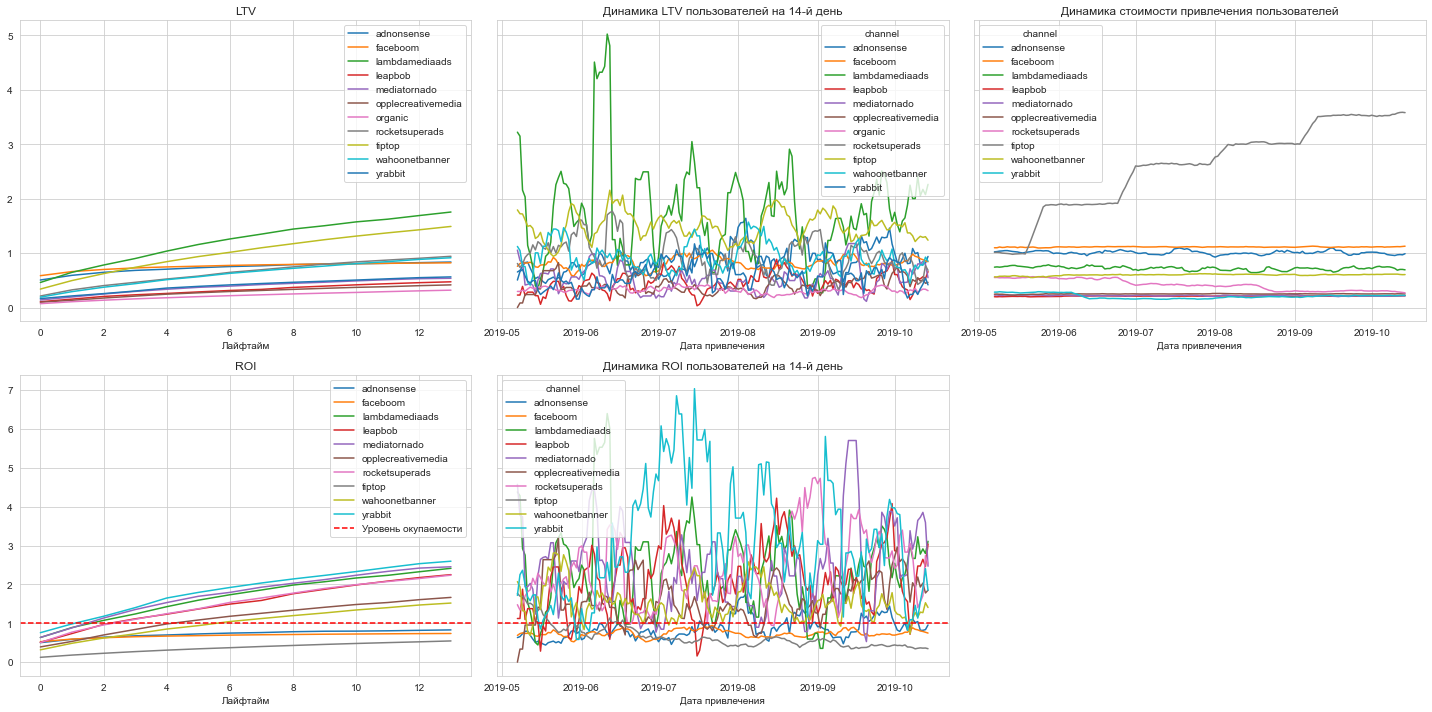

In [77]:
plot_ltv_roi(ltv=ltv,
             ltv_history=ltv_history,
             roi=roi,
             roi_history=roi_history,
             horizon=14,
             window=7)

## Итоги анализа окупаемости рекламы для разных каналов ##
1. не окупаются пользователи привлеченные следующими каналами:
   - tiptop
   - faceboom
   - adnosense
2. ежемесячный рост расходов на привлечение пользователей средствами канала tiptop

<a id='conv_ret'></a>
# Конверсия и удержание #

In [78]:
observation_date = pd.to_datetime('20191101', format='%Y%m%d')
horizon_days = 14

In [79]:
def viz_conv_ret(dimension=[]):
    conversion_raw, conversion, conversion_history = get_conversion(profiles=users,
                                                                    purchases=data_orders,
                                                                    observation_date=observation_date,
                                                                    horizon_days=horizon_days,
                                                                    dimensions=dimension)

    retention_raw, retention, retention_history = get_retention(profiles=users,
                                                                sessions=data_visits,
                                                                observation_date=observation_date,
                                                                horizon_days=horizon_days,
                                                                dimensions=dimension)

    # исключаем размеры когорт и удержание первого дня
    report = retention.drop(columns=['cohort_size', 0])

    # задаём размер сетки для графиков
    plt.figure(figsize = (20, 6))
    for i, payer in enumerate(users['payer'].unique()):
        report.query('payer == @payer')\
            .droplevel(['payer']).T\
            .plot(grid=True,
                  xticks=list(report.columns.values),
                  ax=plt.subplot(1, 2, i + 1))

    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))
    plt.show()

    plt.figure(figsize=(20, 6)) # размер сетки для графиков
    report = conversion.drop(columns = 'cohort_size')

    report.T.plot(
        grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
    )  # во второй — кривые конверсии
    plt.title('Кривая конверсии')
    # постройте тепловую карту
    sns.heatmap(report,
                annot=True, fmt='.2%', ax=plt.subplot(1, 2, 2))
    plt.title('Тепловая карта конверсии')
    plt.show()

<a id='conv_ret_channel'></a>
## Конверсия и удержание с учетом канала привлечения ##

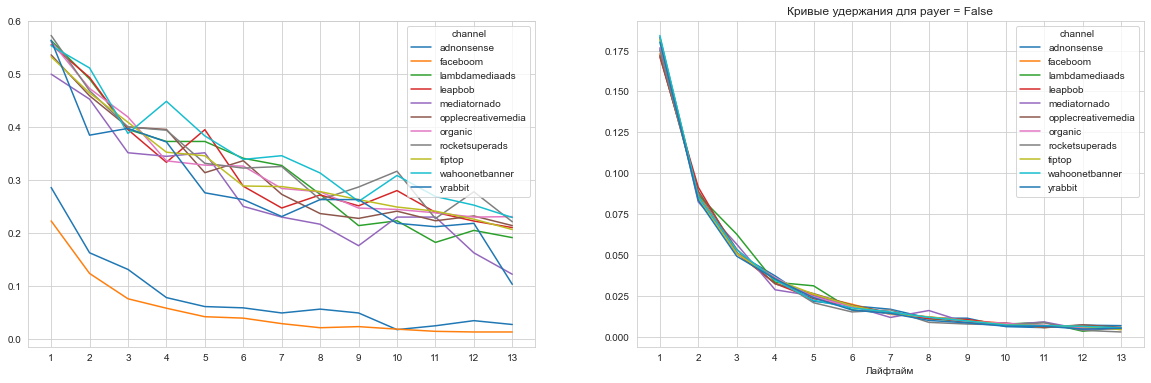

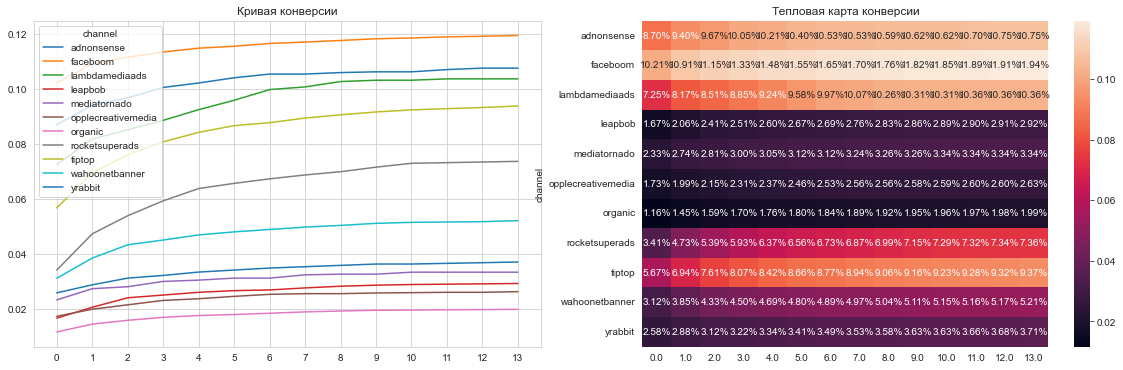

In [80]:
viz_conv_ret(dimension=['channel'])

<a id='conv_ret_device'></a>
## Конверсия и удержание с учетом пользовательских устройств ##

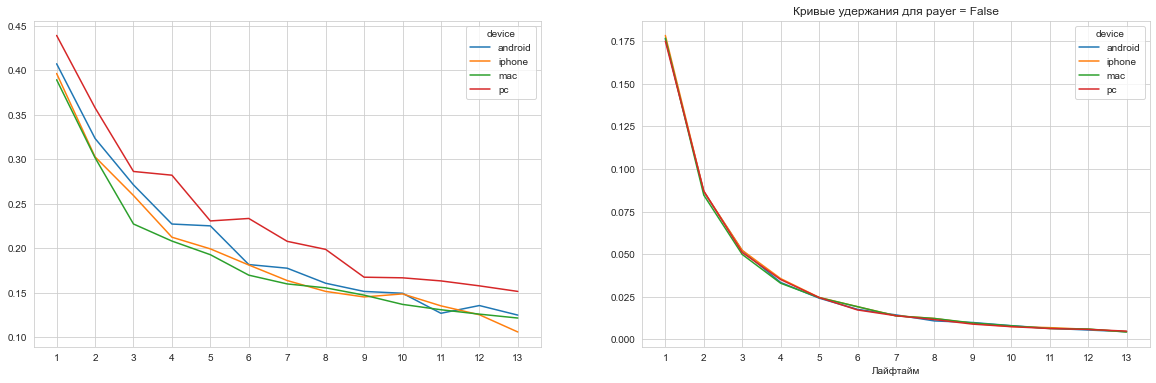

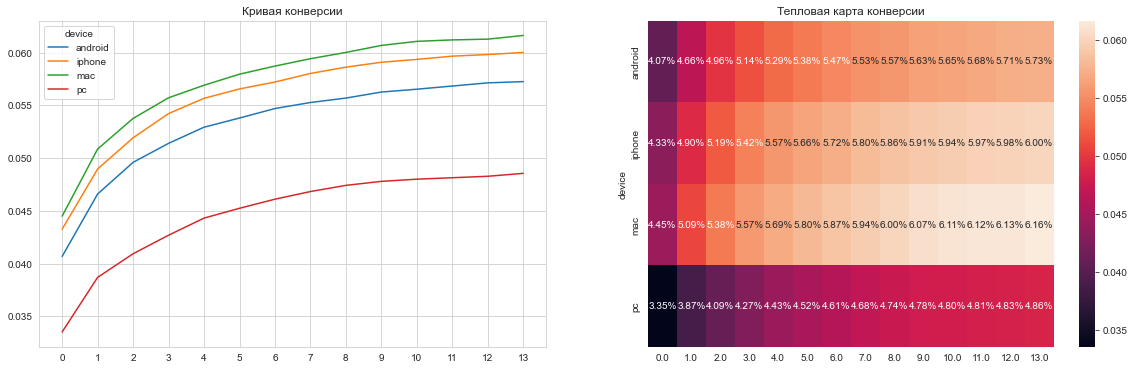

In [81]:
viz_conv_ret(dimension=['device'])

<a id='conv_ret_region'></a>
## Конверсия и удержание с учетом региона ##

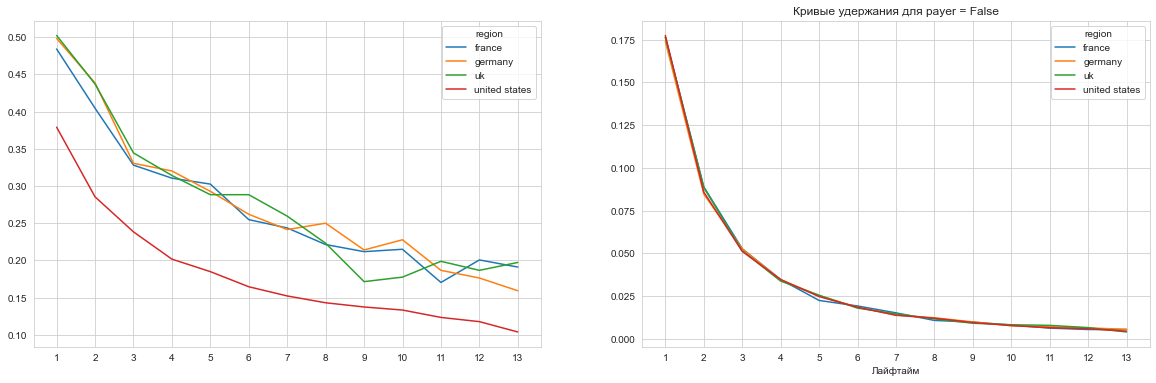

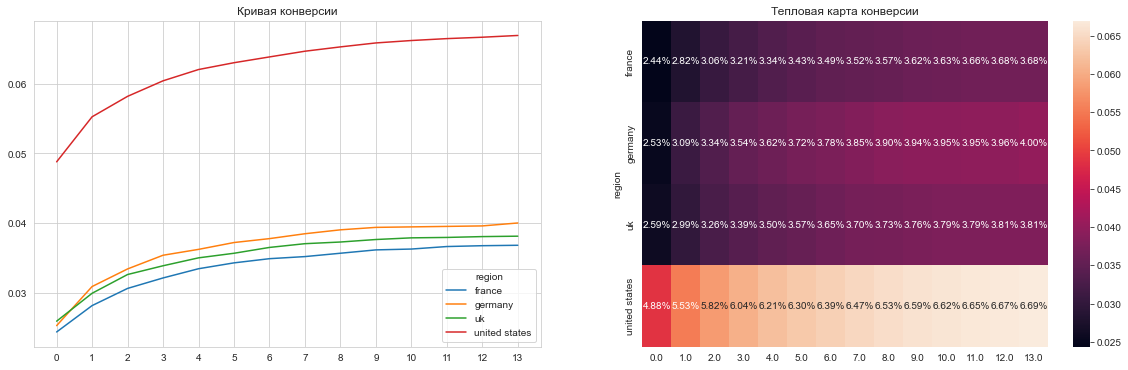

In [82]:
viz_conv_ret(dimension=['region'])

# Результаты анализа конверсии и удержания #
1. высокая конверсия пользователей США
2. низкое удержание пользователей США
3. низкая конверсия пользователей pc
4. удержание пользователей pc выше чем у остальных пользовательских платформ
5. лидерами по привлечению новых платящих пользователей являются:
   - faceboom
   - adnonsense
   - lambdamediaads
   - tiptop
6. самое низкое удержание наблюдается среди пользователей привлеченных средствами:
   - adnonsense
   - faceboom
7. высокие показатели удержания наблюдаются среди пользователей привлеченных средствами:
   - lambdamediaads
   - tiptop

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ В конце шага напиши промежуточный вывод по всем графикам. Конечному заказчику так проще, не надо выискивать выводы по всему шагу.
</div>

<div class="alert alert-block alert-info">

<b>Комментарий cтудента</b>
Исправлено.

</div>

<a id='summary'></a>
# Вывод #
1. необходимо вяснить причины низкого удержания пользователей из США.
   Возможные причины:
   - технические
   - конкуренты
   - культурные особенности
   До выяснения причин снизить расходы на привлечение пользователей из США.
   Данные для выяснения причин отсутствуют
2. необходимо выяснить причины низкой окупаемости пользователей:
   - mac
   - iphone
   До выснения причин снизить расходы на привлечение пользователей указанных платформ.
   Данные для выснения причин отсутствуют.
3. снизить расходы на рекламу на площадках:
   - faceboom
   - adnonsense
   - tiptop
   Указанные площадки обеспечивают высокую конверсию, но затраты не окупаются.
   Возможные причины: особенности аудитории плащадок.
   Данные для выяснения причин отсутсвуют.
4. увеличить расходы на рекламу на площадках:
   - lambdamediaads
   - rocketsuperads
   Затраты на привлечение пользователей средствами перечисленных площадок окупаются.
5. увеличить расходы на рекламу в остальных регионах:
   - Франция
   - Германия
   - Великобритания
   Затраты на привлечение пользователей перечисленных стран окупаются.
6. увеличить расходы на рекламу для пользователей:
   - pc
   - android
   Затраты на привлечение пользователей перечисленных платформ окупаются.

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ В этом проекте очень важно дать интерпретацию графикам и написать развернутые выводы.
Нам надо найти и указать причины плохой окупаемости рекламы: 
- реклама в США - проблемы
- канал TipTop - увеличение САС
- канал FaceBoom - проблемы с удержанием\
и т.д.

А так-же еще написать рекомендации по альтернативным регионам и каналам, маркетологи оценят! 🙂

</div>

<div class="alert alert-block alert-info">

<b>Комментарий cтудента</b>
Исправлено.

</div>

<div style="border:solid black 2px; padding: 20px">
     
  <b>Чек-лист доработок</b>
    
  📃 Добавить краткое описание проекта своими словами.
       
  📃 Проверить данные на дубликаты.
    
  📃 Вывести минимальную и максимальную даты привлечения пользователей по профилям пользователей.
    
  📃 Построить таблицы, отображающие количество пользователей и долю платящих пользователей из каждой страны\устройства\канала.
    
  📃 Поправить ошибки при построении графиков на шаге маркетинга.
      
  📃 Убрать канал "organic" из расчета CAC и анализа причин неудовлетворительной окупаемости рекламных затрат.
    
  📃 Добавить промежуточный вывод по шагу оценки окупаемости рекламы.
        
  📃 Пересмотреть общий вывод, добавить больше конкретики и дать альтернативные рекомендации отделу маркетинга.
    
Жду твой проект на повторное ревью. Не стесняйся оставлять комментарии и задавать вопросы. Удачи! Все получится.
</div>